# Ayudantía Árboles de Decisión - Python

## Natalie Julian

El Departamento de Colocación del área de posgrados en negocios en la Universidad de Jain, India está buscando determinar los factores que influyen en que sus estudiantes encuentren trabajo o no. La base de datos Placement_Data_Full_Class.csv contiene información de 215 estudiantes egresados en el MBA de Bussiness Analytics.

Las variables se describen a continuación:

- sl_no. Número de fila.
- gender: Género del estudiante (M: Hombre, F: Mujer).
- ssc_p: Calificación de la escuela en 1°-10° Grado (en porcentaje).
- ssc_b: Tipo de Junta de Educación en 1°-10° Grado (Central/Other)
- hsc_p: Calificación de la escuela en 11°-12° Grado (en porcentaje).
- hsc_b: Tipo de Junta de Educación en 11°-12° Grado (Central/Other)
- hsc_s: Especialización en la escuela en 11°-12° Grado.
- degree_p: Calificación en el grado de educación superior (en porcentaje).
- degree_t: Área del grado de educación superior.
- workex: Experiencia laboral (Yes/No).
- etest_p: Calificación del test de empleabilidad (en porcentaje).
- specialisation: Categoría de especialización del MBA.
- mba_p: Calificación del MBA (en porcentaje).
- status: Indicador si tiene o no un ofrecimiento de trabajo (Placed/Not Placed).
- salary: Sueldo ofrecido a los candidatos en la oferta.

Interesa determinar qué características de egresados se relacionan con una mayor probabilidad de caer en el grupo que tiene Oferta de trabajo (Placed).

### a) Cargue la base de datos. ¿Hay alguna columna que no sea necesaria en la base de datos? Realice el cambio que estime pertinente. 

In [23]:
import pandas as pd

df = pd.read_csv('Placement_Data_Full_Class.csv')

df.head(200)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,M,66.00,Central,76.00,Central,Commerce,72.00,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95,Placed,275000.0
196,197,M,72.00,Others,63.00,Others,Science,77.50,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,Placed,250000.0
197,198,F,83.96,Others,53.00,Others,Science,91.00,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0
198,199,F,67.00,Central,70.00,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN


In [24]:
df=df.drop('sl_no', axis=1) 

In [25]:
print(df)

    gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
214      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status    salary  
0       N

### b) Determine si existen o no datos faltantes, visualice la proporción de datos faltantes en la base de datos. ¿En qué variable hay mayor cantidad de datos faltantes? ¿Qué haría en este caso con los casos con datos faltantes? Discuta.

In [26]:
df.info() #El salario tiene un 30% de datos faltantes y es la única variable con datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


<AxesSubplot:>

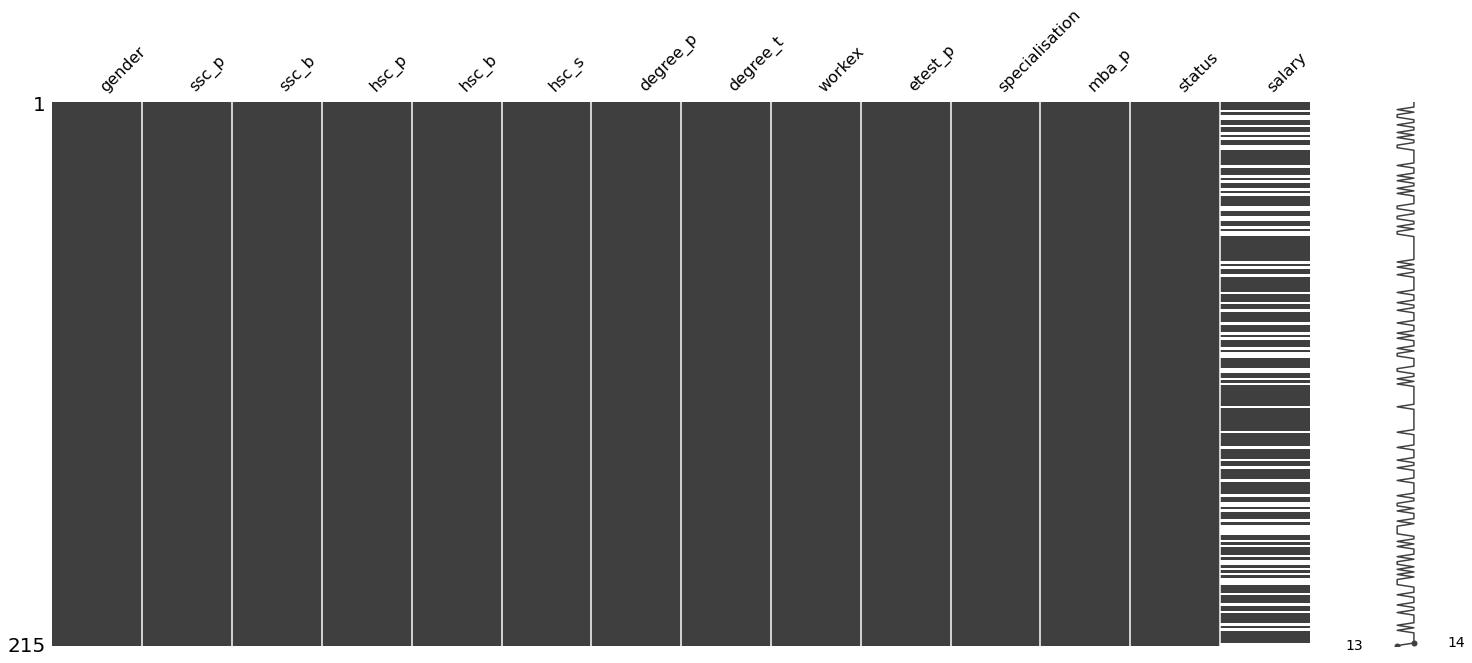

In [27]:
#para instalar missingno
#conda install -c conda-forge/label/gcc7 missingno

import missingno as msngo
msngo.matrix(df)

Debido a la cantidad de datos faltantes, aproximadamente un 30% en la variable salary, se omitirá esta columna.

In [28]:
df=df.drop('salary', axis=1) 

### c) ¿Cuántos egresados tienen una oferta de trabajo posterior al MBA? ¿Cuántos no? ¿Por qué es importante revisar esto antes o posterior a particionar la data en split de entrenamiento y test? Discuta.  

In [29]:
df['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [30]:
print(pd.crosstab(index=df["status"], columns="count"))

col_0       count
status           
Not Placed     67
Placed        148


Si tenemos clases muy desbalanceadas, esto puede indicar un problema. También lo que puede ocurrir es que en el set de entrenamiento o prueba no caigan observaciones de ambas clases.

### d) Obtenga el set de entrenamiento y testeo en una proporción 70% y 30% respectivamente (recuerde definir apropiadamente X e y). Verifique que en cada set existen observaciones de ambas clases.

Recordemos que antes de hacer el split, X debe ser una matriz numérica con toda la información de las variables predictoras. A la vez, y debe ser una columna numérica con la información de la variable target. 

##### Definir apropiadamente la matriz X de variables predictoras

In [31]:
X=df.drop('status', axis=1) 

print(X) #Debemos realizar la transformación de todas las variables categóricas como corresponden

    gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
214      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p  
0       No     55.0         Mkt

In [32]:
X_num=X[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] #Guardamos todas las numéricas en un objeto X_num

In [33]:
#Las variables categóricas son:

#gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation

X_full=pd.concat([X_num, #Variables numéricas
                 pd.get_dummies(df['gender'], drop_first = True, prefix='gender'), #Género 
                 pd.get_dummies(df['ssc_b'], drop_first = True, prefix='junta110'),   #Tipo de junta 1°-10° Grado 
                 pd.get_dummies(df['hsc_b'], drop_first = True, prefix='junta1112'), #Tipo de junta 11°-12° Grado 
                 pd.get_dummies(df['degree_t'], drop_first = True, prefix='areagr'),   #Área del grado ed superior
                 pd.get_dummies(df['workex'], drop_first = True, prefix='exp'),   #Experiencia laboral
                 pd.get_dummies(df['specialisation'], drop_first = True, prefix='spec'),   #Especialización MBA
                 ], axis=1 )


X_full.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,junta110_Others,junta1112_Others,areagr_Others,areagr_Sci&Tech,exp_Yes,spec_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,0,0,0,0


##### Definir apropiadamente la matriz Y de la variable target

In [34]:
print(df['status']) #Debemos recodificar Y en unos y ceros

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object


In [35]:
Y=pd.get_dummies(df['status'], drop_first = True).Placed  #get dummies crea una matrix, extraigo solo la columna Placed

print(Y)

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: Placed, Length: 215, dtype: uint8


##### Obtener el split de entrenamiento y prueba

In [36]:
from sklearn.model_selection import train_test_split

#set de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_full, Y, test_size=0.3, random_state=2020)

In [37]:
print(pd.crosstab(index=y_train, columns="count")) 

col_0   count
Placed       
0          43
1         107


In [38]:
print(pd.crosstab(index=y_test, columns="count")) 

col_0   count
Placed       
0          24
1          41


### e) Entrene el árbol de decisión fijando una profundidad máxima, grafique y describa los distintos perfiles que se asocian a una mayor probabilidad de tener una oferta de trabajo una vez egresados del MBA.

[Text(297.6, 570.7800000000001, 'ssc_p <= 55.64\ngini = 0.409\nsamples = 150\nvalue = [43, 107]\nclass = Placed'),
 Text(148.8, 407.70000000000005, 'mba_p <= 53.245\ngini = 0.147\nsamples = 25\nvalue = [23, 2]\nclass = Not Placed'),
 Text(74.4, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Placed'),
 Text(223.20000000000002, 244.62, 'degree_p <= 70.655\ngini = 0.08\nsamples = 24\nvalue = [23, 1]\nclass = Not Placed'),
 Text(148.8, 81.53999999999996, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = Not Placed'),
 Text(297.6, 81.53999999999996, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Placed'),
 Text(446.40000000000003, 407.70000000000005, 'hsc_p <= 50.415\ngini = 0.269\nsamples = 125\nvalue = [20, 105]\nclass = Placed'),
 Text(372.0, 244.62, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not Placed'),
 Text(520.8000000000001, 244.62, 'ssc_p <= 64.3\ngini = 0.229\nsamples = 121\nvalue = [16, 105]\nclass = Placed'),
 Text(446.40000000000003, 81.5399999999999

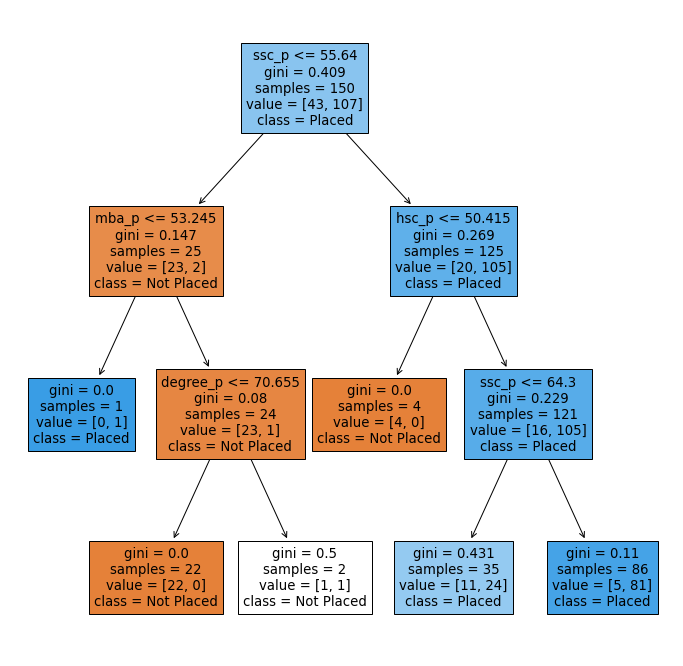

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from matplotlib import pyplot as plt

model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(model, 
          filled=True, 
          feature_names=X_full.columns,
          class_names=['Not Placed', 'Placed']) #Me gustaría más detalle en las reglas de decisión

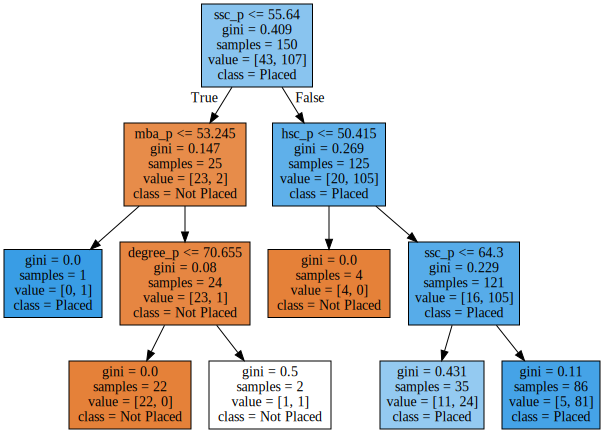

In [41]:
#conda install -c anaconda python-graphviz

import graphviz

treegr = tree.export_graphviz(model, out_file=None, 
                                 feature_names=X_full.columns,
                                 class_names=['Not Placed', 'Placed'],
                                 filled=True)

# Draw graph
graph =  graphviz.Source(treegr, format="png") 
graph

### f) Evalúe el poder predictivo del árbol anterior. ¿Confiaría usted en este árbol como una herramienta para predecir si un egresado del MBA encontrará trabajo? ¿Y para predecir si NO encontrará trabajo? Discuta. 

In [42]:
model.predict(X_test) #Entrega la predicción de cada observación

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=uint8)

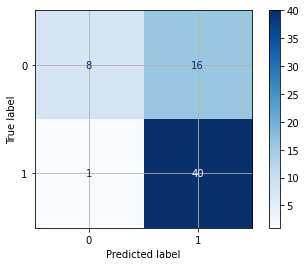

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot(cmap='Blues');
plt.grid(None);


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.33      0.48        24
           1       0.71      0.98      0.82        41

    accuracy                           0.74        65
   macro avg       0.80      0.65      0.65        65
weighted avg       0.78      0.74      0.70        65



A simple vista, pareciera que el modelo predice bastante bien los casos positivos (Placed). Sin embargo, notar que de 65 observaciones, 40 casos son Verdaderos positivos y 16 casos son Falsos positivos, lo que puede estar pasando es que el modelo predice demasiados positivos. A priori no podría tomar una decisión, pues hay muy pocos datos, volvería a recopilar más data y probar si el modelo realmente tiene capacidad predictiva.

### g) Pruebe alguna variante relacionada con los árboles de decisión y evalúe nuevamente el poder predictivo. ¿Cuál es el pero de esta opción? Comente.

Usaré dos variantes, la primera: Buscar los mejores parámetros con validación cruzada. La segunda, un bosque de árboles.

##### Grilla de parámetros en Validación Cruzada

In [46]:
import numpy as np
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}   #Grilla de valores a probar

In [47]:
model_2=DecisionTreeClassifier()

In [48]:
from sklearn.model_selection import GridSearchCV

nfolds=10

dtree_gscv = GridSearchCV(model_2, param_grid, cv=nfolds)

dtree_gscv.fit(X_train, y_train)

dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

Obtenemos que los mejores parámetros son: Criterio de separación de Entropía o Ganancia de Información y una profundidad máxima de 10.

In [49]:
model_cv = DecisionTreeClassifier(max_depth=4, criterion='entropy').fit(X_train, y_train)

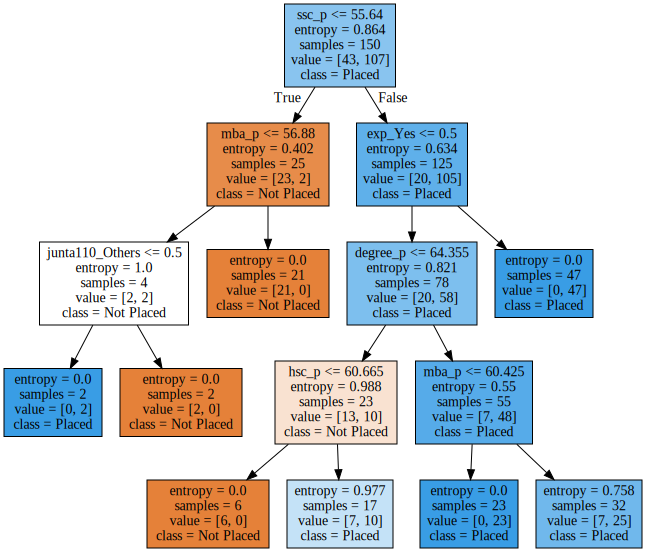

In [50]:
treegr = tree.export_graphviz(model_cv, out_file=None, 
                                 feature_names=X_full.columns,
                                 class_names=['Not Placed', 'Placed'],
                                 filled=True)

# Draw graph
graph =  graphviz.Source(treegr, format="png") 
graph

In [51]:
y_pred_cv = model_cv.predict(X_test)
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50        24
           1       0.72      0.93      0.81        41

    accuracy                           0.72        65
   macro avg       0.73      0.65      0.65        65
weighted avg       0.73      0.72      0.69        65



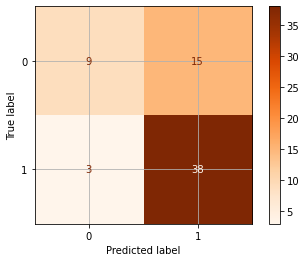

In [52]:
cm=confusion_matrix(y_test, y_pred_cv)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot(cmap='Oranges');
plt.grid(None);

Mejoró el Recall para la clase Not Placed (Negativa) y se niveló un poco más la precisión en ambos grupos. Mejoró el modelo, pero de todas formas considero que faltan más datos para realmente establecer un quórum de la predicción del modelo. 

El PERO que tiene esta opción es que en un caso real, no siempre podemos probar distintos valores de parámetros como hicimos recién, el costo puede ser muy grande en una base de datos de millones de registros y además, necesitamos acotar la grilla de parámetros, lo cuál significa que pudiéramos no necesariamente llegar al mejor valor del parámetro.

##### Bosque de Árboles

In [53]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(n_estimators=100, random_state=2020, criterion='entropy').fit(X_train, y_train)

y_pred_bosque=bosque.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_bosque))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.80      0.95      0.87        41

    accuracy                           0.82        65
   macro avg       0.84      0.77      0.78        65
weighted avg       0.83      0.82      0.81        65



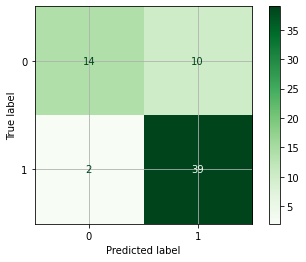

In [55]:
cm=confusion_matrix(y_test, y_pred_bosque)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot(cmap='Greens');
plt.grid(None);

Mejoran bastante las métricas! De 65 observaciones, existen 12 observaciones erróneamente clasificadas, siendo 2 verdaderas Placed y 10 falsas Not Placed. El PERO de esta variante es que al ser 100 árboles, no tenemos un modelo solo para interpretar y seguir los caminos (como si fuera un solo árbol de decisión), lo cual puede caer en el concepto de 'caja negra'. Sin embargo, mejora el poder predictivo, todo va a depender de lo que necesitemos! (También de los recursos disponibles).

Otro PRO de un bosque de árboles es que podemos medir la importancia de los features a la hora de predecir cuándo un egresado del MBA tendrá una oferta de trabajo:

In [56]:
feature_imp = pd.Series(bosque.feature_importances_,index=X_full.columns).sort_values(ascending=False)
feature_imp

ssc_p               0.272797
degree_p            0.230373
hsc_p               0.158809
mba_p               0.106794
etest_p             0.072006
exp_Yes             0.053070
gender_M            0.033577
spec_Mkt&HR         0.017706
junta110_Others     0.016700
areagr_Sci&Tech     0.015908
junta1112_Others    0.015478
areagr_Others       0.006784
dtype: float64

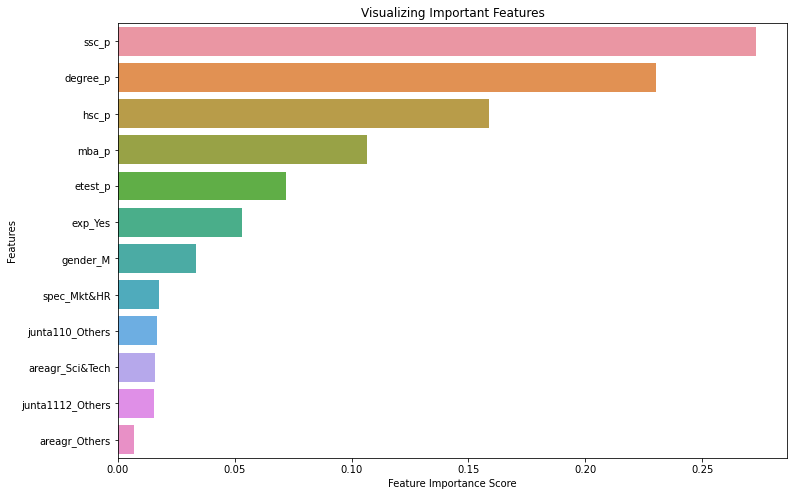

In [57]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Gracias!! Y mucho ánimo en el semestre :D